# Recenze

## Natural Language Prcocessing


In [24]:
import pandas
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


V tomto cvičení zkus naimplementovat klasifikátor, který rozpozná pozitivní recenzi produktu od negativní.  Takové úloze se občas říká _sentiment analysis_.

Pracuj se souborem [reviews.csv](reviews.csv). Soubor obsahuje text recenze, a výstupní proměnnou `label` se dvěma hodnotami, `neg` a `pos`. Můžeš si všimnout, že data už nějakým čištěním prošla. 


In [3]:
data = pandas.read_csv("reviews.csv")
data.head()

,label,product,review
0,neg,music,the cd came as promised and in the condition p...
1,neg,dvd,this was a very annoying and boring flick that...
2,neg,health,the braun ls-5550 silk&soft bodyshave recharge...
3,pos,camera,"when it comes to buying camcorders , i persona..."
4,neg,dvd,i had high hopes for this series when i starte...


In [4]:
# Zobrazení celého textu jedné pozitivní a jedné negativní recenze
display(data[data["label"] == "pos"].iloc[0]["review"])
display(data[data["label"] == "neg"].iloc[1]["review"])

"when it comes to buying camcorders , i personally like the one with the build in memory . but after using this camcorder i was forced to change my mind . unlike other sony camcorders , first of all , it offers upto 40x zoom which is a lot . its a good use of your money . you can have it for under $400 and still works better than a lot of choices out there . easy to use , touch screen , takes still photos , has a good speaker so it 's easier to record video and voice , fits into your palm so to speak , and if you use rewritable mini dvds , you would n't have to worry about go out of memory . so when it comes to sony camcorders , i would say the better quality of this one would get the job done properly ."

"this was a very annoying and boring flick thats barely watchable and throughout the film i kept looking at my watch , the film is not a historical drama nor is it an autobiographical film about william shakespreare infact it is a romantic comedy disguised as a historical drama . my girlfriend insisted that we watch this film together but i was n't in the mood she forced me to watch this , the film was about a struggling young writer shakespeare played by joseph fiennes who falls in love with lady viola played by gwyneth paltro who also happens to inspire his famous play romeo and juliet , this film also won a couple of oscars including gwyny for best actress but i felt like the film was just not that funny because all the characters seemed to talk in an old english style thats hard to understand . overall the film was just o.k. i think that some of the sets and costumes were fantastic and judi dench was great as queen elizabeth but i never want to watch this film again , if your a sha

In [5]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
# Poté na trénovací a testovací data.

X = data["review"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


Porovnej alespoň dva algoritmy. Jaké je nejlepší f1-score, kterého jsi dosáhl/a?



In [10]:
# Step 1: Create TfidfVectorizer with ngram_range=(1, 2)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)

# Step 2: Create LinearSVC classifier
classifier = LinearSVC(random_state=0, max_iter=10000)

# Step 3: Fit the classifier on the vectorized training data
classifier.fit(X_train_vec, y_train)

# Step 4: Transform the test data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

# Step 5: Perform classification on the vectorized test data
y_pred = classifier.predict(X_test_vec)

# Step 6: Calculate and display the rounded statistics
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)

print(f"accuracy: {accuracy}")
print(f"f1 score: {f1}")

accuracy: 0.83
f1 score: 0.83


In [11]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_vec, y_train)
X_test_vec = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vec)
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)

print(f"accuracy: {accuracy}")
print(f"f1 score: {f1}")

accuracy: 0.63
f1 score: 0.63


In [6]:
## Bonus: Příprava pipeline, která obsahuje:
##  1. Matici zastoupení slov
##  2. Klasifikátor

## pipeline umožňuje "hromadně" v sekvenci využívat všechny zařazené součásti

pipeline = Pipeline(
    [
        ## Matice zastoupení slov, vyzkoušíme dvě varianty: TfidfVectorizer a CountVectorizer
        ("vec", TfidfVectorizer(ngram_range=(1, 2))),
        # ("vec", CountVectorizer()),
        ## Klasifikátor, vyzkoušíme dvě varianty: KNN a SVC
        # ("clf", KNeighborsClassifier(n_neighbors=10)),
        ("clf", LinearSVC(random_state=0, max_iter=10_000)),
    ]
)
## pozor, KNN trvá dlouho, u mě asi 90 vteřin, výsledná accuracy je 0.68
## SVC při použití CountVectorizer() nekonverguje k řešení a dává warning, proto zvýšíme max. počet iterací pomocí max_iter=10_000#
## parametr ngram_range=(1, 2) zařídí rozdělení do samostatných slov a zároveň i do dvojic slov

display(pipeline)

# Pustime pipeline
pipeline.fit(X_train, y_train)

# Klasifikace testovacích dat
y_pred = pipeline.predict(X_test)

# Výpočet a zobrazení zaokrouhlených statistik
print(f"accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"f1 score: {round(f1_score(y_test, y_pred, average='weighted'), 2)}")

Pipeline(steps=[('vec', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC(max_iter=10000, random_state=0))])

accuracy: 0.83
f1 score: 0.83


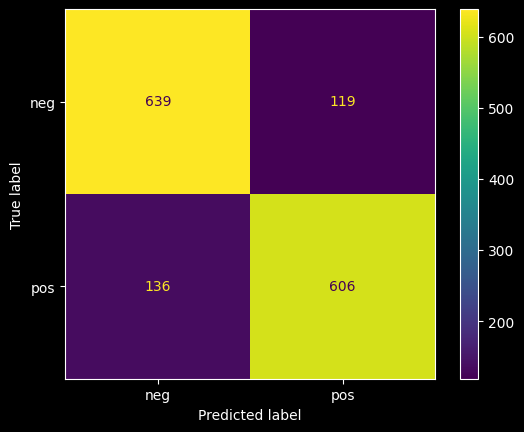

In [8]:
# Zobrazení matice záměn
ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    y_test,
)

### Bonus 1

Identifikuj ty recenze, které tvůj model označil špatně. Na pár z nich se podívej, a zkus odvodit, proč model chyboval.


In [14]:
df = pandas.DataFrame({"text": X_test, "true": y_test, "pred": y_pred}).reset_index(
    drop=True
)
df.head()

,text,true,pred
0,"i bought this book , the paperback version . t...",neg,neg
1,i 'm a zone diet believer - but this book is a...,neg,neg
2,i have an r717 camera . i bought the dock too ...,neg,neg
3,i love this backpack ! it is just what i neede...,pos,pos
4,i have been waiting for this dvd to come out f...,pos,pos


In [15]:
misclassified = df[df["true"] != df["pred"]]
misclassified

,text,true,pred
12,i was 5 minutes early getting out of the house...,pos,neg
15,"yep , it extends the eyepiece out a little bit...",pos,neg
19,this cd has alot of tight hits including : nan...,pos,neg
24,i loved the core knowledge curriculum . the re...,pos,neg
26,i 'm sure glad i did not purchase this cd . ba...,neg,pos
...,...,...,...
1489,there 's too much drama going on in this discu...,pos,neg
1492,turbo tax is fine . the linking into quickbook...,neg,pos
1493,i like wordperfect much better than microsoft ...,pos,neg
1498,"when kerouac , ginsberg , and burroughs set ou...",pos,neg


In [16]:
search_index = 1489

display(misclassified.loc[search_index])
print(misclassified.loc[search_index].to_list())

text    there 's too much drama going on in this discu...
true                                                  pos
pred                                                  neg
Name: 1489, dtype: object

["there 's too much drama going on in this discussion ! i do n't really care about what year these episodes came out or that there are 9 missing episodes of the new scooby doo movies . i 'm just glad there 's more scooby ! !", 'pos', 'neg']


### Bonus 2

Všimni si, že soubor obsahuje také sloupec `product`, který identifikuje kategorii produktu.

1. Mohlo by být zajímavé se podívat, jestli je možné data do těchto kategorií shlukovat bez využití této informace. Data normalizuj (například pomocí `TfidfVectorizer`), a zkus spustit nějaký shlukovací algoritmus, například `KMeans`. Výsledky shlukování můžeš "obarvit" správnými kategoriemi. Povedlo se modelu predikovat kategorie? 

2. Vyzkoušej také klasifikaci do těchto kategorií. Které kategorie se těžko odlišují?

In [44]:
data = pandas.read_csv("reviews.csv")

# Normalizace dat pomocí TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["review"])

# Shlukování pomocí KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

# Přiřazení shluků kategorie produktů
data["predicted_cluster"] = kmeans.labels_

/Users/entiaperse/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
# Vypsání přiřazení shluků a skutečných kategorií
results = pandas.DataFrame(
    {"Category": data["product"], "Predicted Cluster": data["predicted_cluster"]}
)
results.pivot_table(
    index="Category", columns="Predicted Cluster", aggfunc="size", fill_value=0
)

Predicted Cluster,0,1,2,3,4,5
Category,,,,,,
books,185,23,0,266,9,510
camera,300,197,474,17,0,0
dvd,350,47,1,588,17,9
health,584,367,0,31,0,4
music,275,22,0,101,629,0
software,321,633,0,24,11,5


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, data["product"], test_size=0.2, random_state=42
)

# Trénování klasifikátoru NaiveBayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predikce kategorií pro testovací data
y_pred = clf.predict(X_test)

# Vyhodnocení klasifikace
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       books       0.96      0.91      0.94       193
      camera       0.77      0.96      0.86       189
         dvd       0.90      0.93      0.92       197
      health       0.97      0.74      0.84       202
       music       0.94      0.95      0.94       206
    software       0.92      0.92      0.92       213

    accuracy                           0.90      1200
   macro avg       0.91      0.90      0.90      1200
weighted avg       0.91      0.90      0.90      1200

